- Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)  
- Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety  
- Разделите данные на выборку для обучения и тестирования  
- Постройте модель LDA  
- Визуализируйте предсказания для тестовой выборки и центры классов  
- Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width  
- Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию  

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
iris = load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
# загружаем данные в датафрейм
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data_class = iris.target

In [5]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.2)

In [7]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
77,6.7,3.0,5.0,1.7
42,4.4,3.2,1.3,0.2
138,6.0,3.0,4.8,1.8
16,5.4,3.9,1.3,0.4
57,4.9,2.4,3.3,1.0
...,...,...,...,...
141,6.9,3.1,5.1,2.3
139,6.9,3.1,5.4,2.1
71,6.1,2.8,4.0,1.3
2,4.7,3.2,1.3,0.2


In [8]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [9]:
lda = LinearDiscriminantAnalysis()

In [10]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [11]:
lda.predict(X_test)

array([2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 1, 2, 1, 1, 0, 0, 1, 0, 2, 1, 0, 2,
       0, 1, 2, 1, 0, 1, 0, 1])

In [12]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,2,2
1,2,2
2,1,1
3,0,0
4,1,2
5,2,1
6,1,1
7,2,2
8,0,0
9,2,2


In [13]:
# расчет точности - отношение верных прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов 
# (наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [14]:
accuracy_score(y_test, lda.predict(X_test))

0.8666666666666667

In [15]:
f1_score(y_test, lda.predict(X_test), average='micro')

0.8666666666666667

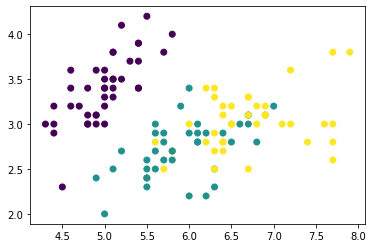

In [16]:
# визуализируем дискриминантную линию только по 2 признакам
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
plt.show()

In [17]:
#делаем тестовые и тренировочные мн-ва только для 2-х признаков
small_train = X_train[(y_train == 0) | (y_train == 2)]
small_train = small_train[['sepal length (cm)', 'sepal width (cm)']]
sy_train = y_train[(y_train == 0) | (y_train == 2)]
small_test = X_test[(y_test == 0) | (y_test == 2)]
small_test = small_test[['sepal length (cm)', 'sepal width (cm)']]
sy_test = y_test[(y_test == 0) | (y_test == 2)]

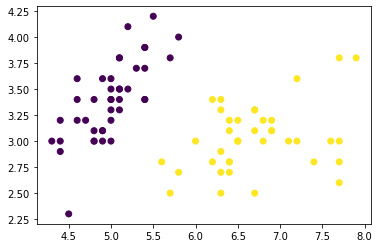

In [18]:
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
plt.show()

In [19]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [20]:
# посмотрим на наши центроиды
lda_small.means_

array([[4.9902439 , 3.4       ],
       [6.7       , 3.02564103]])

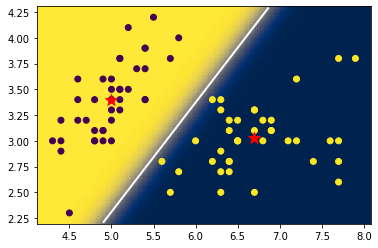

In [21]:
# сам scatter plot
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='cividis_r',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [22]:
lda_small.coef_

array([[ 11.12917017, -10.48509302]])

Оба признака практически одинаково влияют на определение класса. (угол наклона около 45 градусов)

In [23]:
data[['sepal length (cm)', 'sepal width (cm)']].corr()

,sepal length (cm),sepal width (cm)
sepal length (cm),1.00000,-0.11757
sepal width (cm),-0.11757,1.00000


Корреляция между этими признаками маленька (всего 11%)

### Логистическая регрессия

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lr = LogisticRegression()

In [26]:
lr.fit(small_train, sy_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
lr.predict(small_test)

array([2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0])

In [28]:
accuracy_score(sy_test, lr.predict(small_test))

0.95

In [29]:
lr.coef_

array([[ 3.14205307, -1.61434312]])

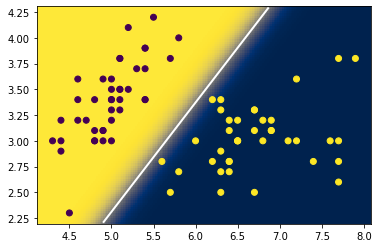

In [30]:
# сам scatter plot
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='cividis_r',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

Получили похожий график как и в дискриминантном анализе

### Кластеризация

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

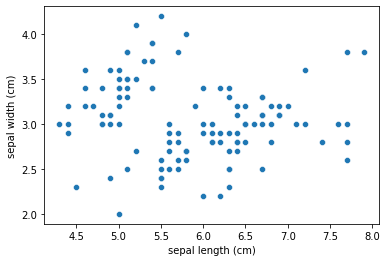

In [31]:
sns.scatterplot(data = X_train[['sepal length (cm)', 'sepal width (cm)']], \
                x=X_train['sepal length (cm)'], \
                y=X_train['sepal width (cm)'] \
               )

Размерности близки, нормировать не надо. 

In [32]:
from sklearn.cluster import KMeans

In [33]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=2)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_train)
clusters

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int32)

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

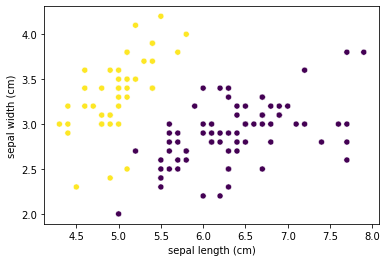

In [34]:
sns.scatterplot(data = X_train[['sepal length (cm)', 'sepal width (cm)']], \
                x=X_train['sepal length (cm)'], \
                y=X_train['sepal width (cm)'], \
                c=clusters \
               )

In [35]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_train)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

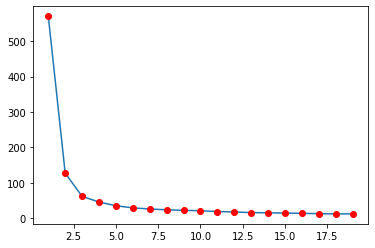

In [36]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

оставляем 2 кластера, так как дальнейшее увеличение не дает заметных изменений. 